<a href="https://colab.research.google.com/github/VinhDo0608/LPR/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_bi%E1%BB%83n_s%E1%BB%91_xe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

/content/drive/MyDrive/Colab Notebooks/YOLOv8


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hxR7jLXefsH7x2nRDLhW")
project = rf.workspace("hanoi-university-of-industry-3aaph").project("automatic-detect-lisence-vietnam-project")
dataset = project.version(8).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Automatic-detect-Lisence-Vietnam-Project-8 in yolov8:: 100%|██████████| 11824/11824 [01:40<00:00, 117.36it/s]


In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 33.0 MB/s eta 0:00:00
Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo train model=yolov8n.pt data="/content/drive/MyDrive/Colab Notebooks/YOLOv8/Automatic-detect-Lisence-Vietnam-Project-8/data.yaml" epochs=10 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 101MB/s]
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/YOLOv8/Automatic-detect-Lisence-Vietnam-Project-8/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

In [ ]:
!yolo export model=yolov8n.pt format=torchscript

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 3.4s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (5.4s)
Results saved to /content/drive/MyDrive/Colab Notebooks/YOLOv8
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/YOLOv8/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/content/drive/MyDrive/Colab Notebooks/bien-so-xe-loai-5-so.jpg')  # predict on an image


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Colab Notebooks/bien-so-xe-loai-5-so.jpg: 480x640 1 vehicle registration plate, 98.6ms
Speed: 13.8ms preprocess, 98.6ms inference, 1017.0ms postprocess per image at shape (1, 3, 480, 640)



0: 480x640 3 Lisence_plates, 95.0ms
Speed: 3.2ms preprocess, 95.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


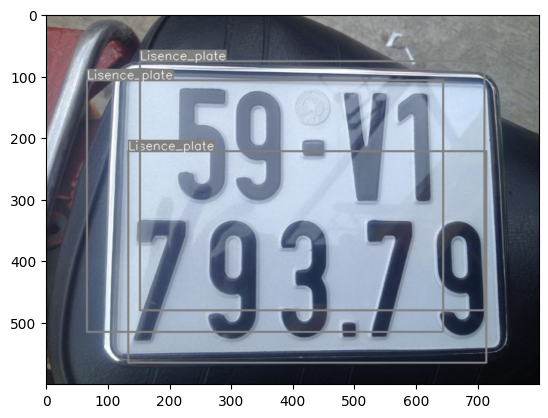

In [ ]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
model = YOLO('/content/drive/MyDrive/Colab Notebooks/YOLOv8/yolov8m.pt')  # load a custom model
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bien-so-xe-loai-5-so.jpg")
results = model.predict(img)


for r in results:
    annotator = Annotator(img)
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
        c = box.cls
        annotator.box_label(b, model.names[int(c)])
img = annotator.result()

plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import easyocr
import numpy as np


In [ ]:
path_video = "/content/drive/MyDrive/Colab Notebooks/main_video.mp4"
path_model = "/content/drive/MyDrive/Colab Notebooks/YOLOv8/LP_detector_nano_61.pt"
cap = cv2.VideoCapture(path_video)
model_custom = YOLO("/content/drive/MyDrive/Colab Notebooks/YOLOv8/yolov8m.pt")

In [ ]:
def getColor(label):
    palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)
    color = [int((p * (label ** 2 - label + 1)) % 255) for p in palette]
    return color


def draw_boxes(origin, bbox):
    img = origin.copy()
    for i, box in enumerate(bbox):
        x1, y1, x2, y2 = [int(j) for j in box]
        color = getColor(0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    return img


0: 384x640 (no detections), 29.4ms
Speed: 3.1ms preprocess, 29.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 3.1ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 3.5ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 7.4ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lisence_plate, 26.4ms
Speed: 4.4ms preprocess, 26.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
['*4 1968']


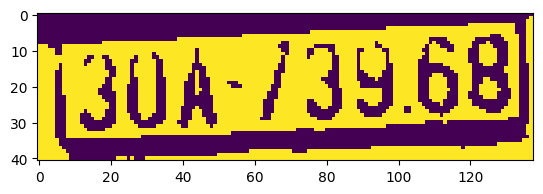


0: 384x640 1 Lisence_plate, 25.2ms
Speed: 3.5ms preprocess, 25.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
['i04 43968']


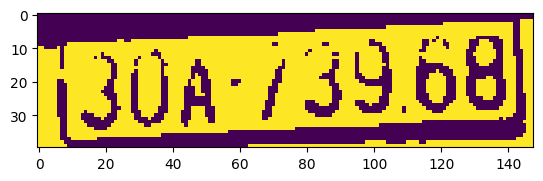


0: 384x640 1 Lisence_plate, 27.4ms
Speed: 3.4ms preprocess, 27.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
['1304. /3968']


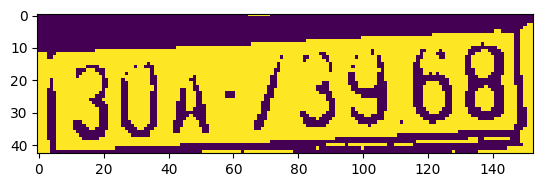


0: 384x640 1 Lisence_plate, 25.1ms
Speed: 4.3ms preprocess, 25.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
['BO4', '3968]']


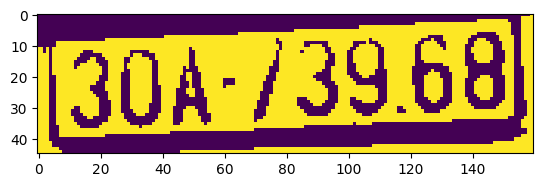


0: 384x640 1 Lisence_plate, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
['3O4 13963']


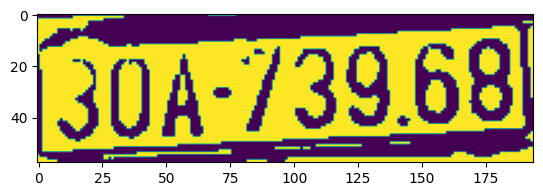


0: 384x640 1 Lisence_plate, 25.1ms
Speed: 4.7ms preprocess, 25.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
['B0A 73968']


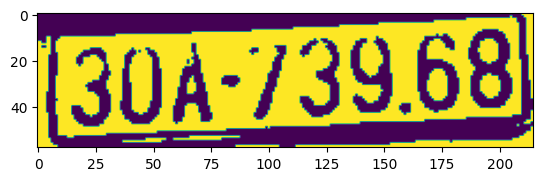

In [ ]:
path_video = "/content/drive/MyDrive/Colab Notebooks/main_video.mp4"
path_model = "/content/drive/MyDrive/Colab Notebooks/YOLOv8/LP_detector_nano_61.pt"
cap = cv2.VideoCapture(path_video)
model_custom = YOLO("/content/drive/MyDrive/Colab Notebooks/YOLOv8/yolov8m.pt")

list_results = []

# Set frames per second
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate frame interval for capturing one frame per second
frame_interval = int(fps)

# Counter to keep track of frames
frame_count = 0

while True:
    res, frame = cap.read()
    if not res:
        break

    # If the current frame is at the desired interval, save it
    if frame_count % frame_interval == 0:
        frame_show = frame.copy()

        # Assuming model_custom is your object detection model
        predict = model_custom.predict(frame)


        for index, value in enumerate(predict):
            # print(value)
            # xyxy = value.boxes.xyxy.cpu().tolist()
            xyxy = value.boxes.xyxy.to('cpu').numpy()
            if len(xyxy):
                frame_show = draw_boxes(frame_show, xyxy)

                # print(xyxy)
                xyxy = xyxy.astype(int)[0]
                croped = frame.copy()[xyxy [1]: xyxy [3], xyxy [0]: xyxy [2]]

                img = cv2.cvtColor(croped, cv2.COLOR_BGR2GRAY)
                thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

                plt.imshow(thresh1)
                reader = easyocr.Reader(['en'])
                result = reader.readtext(thresh1, detail = 0)
                print(result)
                list_results.append(result)

        # Display the image using matplotlib
        # plt.imshow(frame_show[:, :, ::-1])
        plt.show()



    frame_count += 1

    # Break after capturing 10 frames
    if frame_count >= 10 * frame_interval:
        break


# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
list_results

[['B04 /39168'],
 ['B173968'],
 ['I34. /3968'],
 ['B4 968'],
 ['BL /968]'],
 ['BA 73968]']]